In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import xgboost as xgb

In [2]:
pd.set_option('display.max.columns',None)

In [3]:
df=pd.read_csv('C:/Users/User/Desktop/datascience/test4.csv')

In [4]:
df.head(5)

,trf1,trf2,trf3,trf4,trf5,trf6,trf7,trf8,trf9,cload,dvt1,dvt2,dvt3,dvt4,dvt5,dvt6,dvt7,dvt8,dvt9,type,d1,delay1,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,25.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.10,0.002080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-12.823909,1.500000e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.08,0.002070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-12.958607,1.100000e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.61,0.000969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-12.958607,1.100000e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.94,0.000858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-13.301030,5.000000e-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.89,0.000848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-13.221849,6.000000e-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
columns=['trf1','trf2','trf3','trf4','trf5','trf6','trf7','trf8','trf9','cload','dvt1','dvt2','dvt3','dvt4',
        'dvt5','dvt6','dvt7','dvt8','dvt9','type','d1'
        ]

In [112]:
df2=df[columns]

In [113]:
df2.head()

,trf1,trf2,trf3,trf4,trf5,trf6,trf7,trf8,trf9,cload,dvt1,dvt2,dvt3,dvt4,dvt5,dvt6,dvt7,dvt8,dvt9,type,d1
0,25.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.10,0.002080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-12.823909
1,11.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.08,0.002070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-12.958607
2,59.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.61,0.000969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-12.958607
3,29.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.94,0.000858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-13.301030
4,45.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.89,0.000848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-13.221849


In [8]:
#check for missing values
df2.isnull().sum()

trf1     0
trf2     0
trf3     0
trf4     0
trf5     0
trf6     0
trf7     0
trf8     0
trf9     0
cload    0
dvt1     0
dvt2     0
dvt3     0
dvt4     0
dvt5     0
dvt6     0
dvt7     0
dvt8     0
dvt9     0
type     0
d1       0
dtype: int64

In [9]:
df2.isna().sum()

trf1     0
trf2     0
trf3     0
trf4     0
trf5     0
trf6     0
trf7     0
trf8     0
trf9     0
cload    0
dvt1     0
dvt2     0
dvt3     0
dvt4     0
dvt5     0
dvt6     0
dvt7     0
dvt8     0
dvt9     0
type     0
d1       0
dtype: int64

In [10]:
df2.describe()

,trf1,trf2,trf3,trf4,trf5,trf6,trf7,trf8,trf9,cload,dvt1,dvt2,dvt3,dvt4,dvt5,dvt6,dvt7,dvt8,dvt9,type,d1
count,181384.000000,181384.000000,181384.000000,181384.000000,181384.000000,181384.000000,181384.000000,181384.000000,181384.000000,181384.000000,181384.000000,181384.000000,181384.000000,181384.000000,181384.000000,181384.000000,181384.000000,181384.000000,181384.000000,181384.000000,181384.000000
mean,26.261065,20.629110,12.937940,8.557252,4.999005,3.452630,2.933509,2.446375,1.925391,50.294259,0.017660,0.014276,0.008561,0.006017,0.003392,0.002221,0.002218,0.001697,0.001158,3.370446,-12.458870
std,22.161741,22.299016,20.321011,17.628913,14.073623,12.005822,11.161117,10.272551,9.130388,28.955867,0.020584,0.019646,0.016475,0.014984,0.011317,0.009278,0.009851,0.008292,0.006389,2.168301,0.837537
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-15.397940
25%,7.990000,2.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.120000,0.003170,0.001440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-13.045757
50%,19.910000,12.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.895000,0.008750,0.005550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-12.455900
75%,39.480000,32.962500,19.430000,7.410000,0.000000,0.000000,0.000000,0.000000,0.000000,75.460000,0.025300,0.020600,0.008780,0.003220,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,-11.872895
max,101.540000,101.690000,101.290000,101.470000,101.300000,100.920000,101.210000,100.980000,100.980000,100.990000,0.255000,0.226000,0.251000,0.395000,0.267000,0.249000,0.311000,0.224000,0.168000,9.000000,-8.656394


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trf1'>

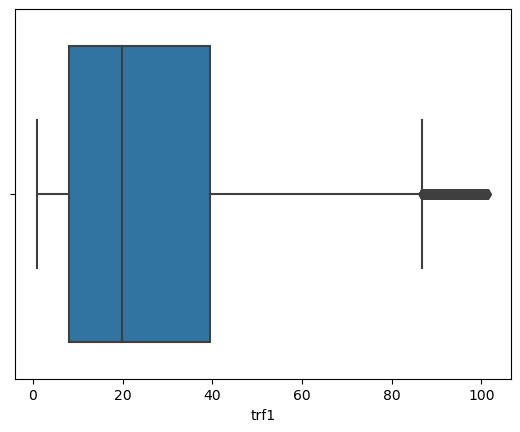

In [11]:
#checking for outliers in the trf1 column
sns.boxplot(df2['trf1'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cload'>

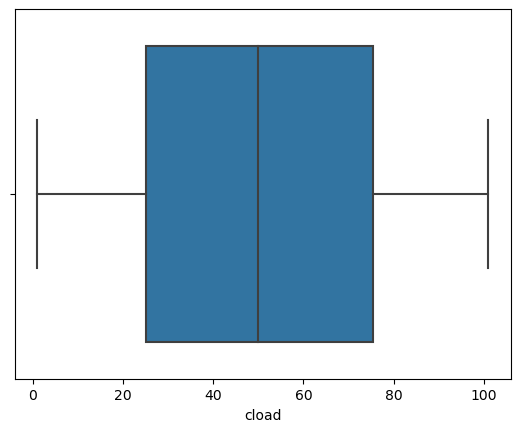

In [11]:
#checking for outliers in the cload column
sns.boxplot(df2['cload'])

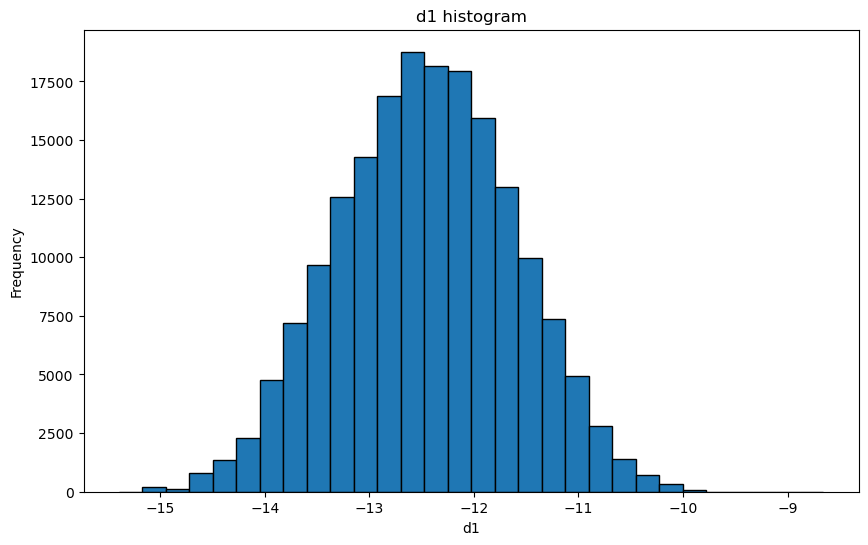

In [14]:
#first lets see the distribution of the delay1
plt.figure(figsize=(10,6))
plt.hist(df2['d1'],bins=30,edgecolor='black')
plt.xlabel('d1')
plt.ylabel('Frequency')
plt.title('d1 histogram')
plt.show()

In [12]:
df2['type'].value_counts(normalize=True)*100

2    21.950668
1    21.047612
3    20.393750
4    11.325696
5     7.452146
6     6.300445
7     5.116769
9     3.427535
8     2.985379
Name: type, dtype: float64

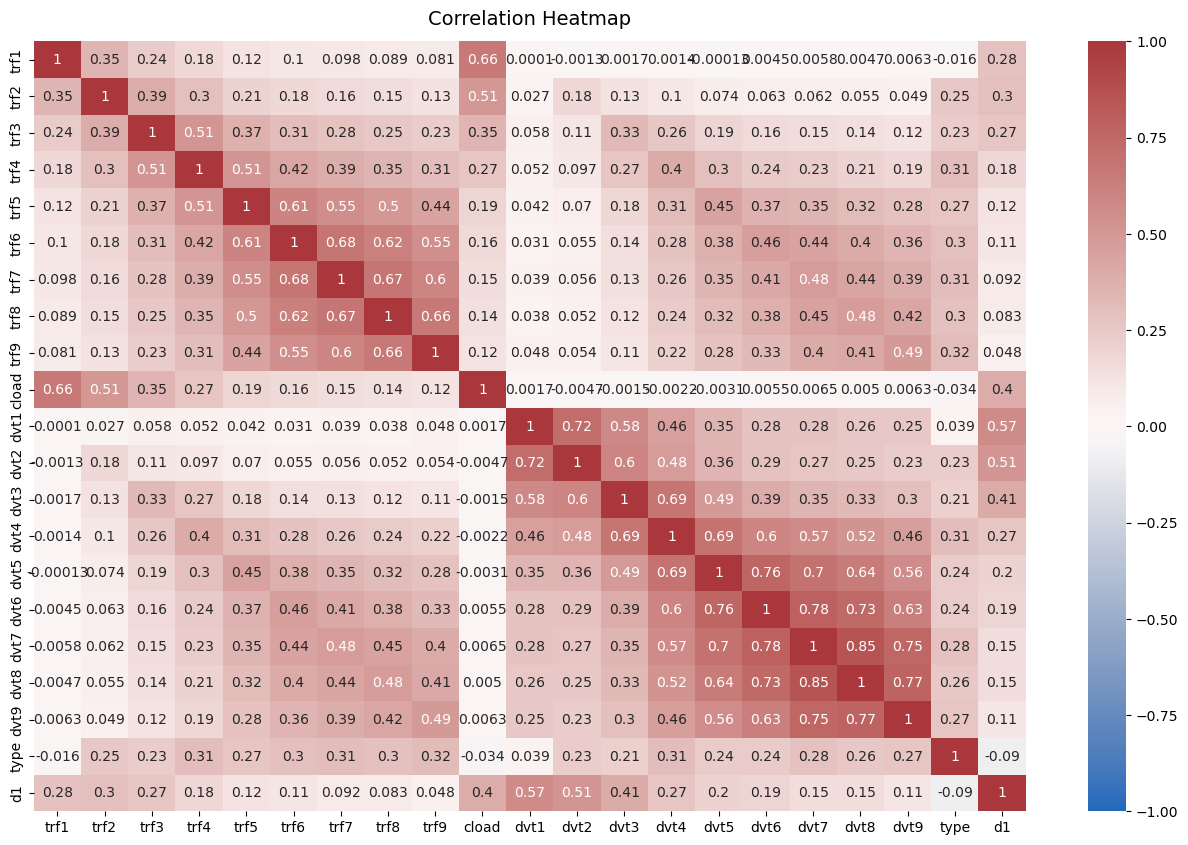

In [16]:
plt.figure(figsize=(16,10))
heatmap=sns.heatmap(df2.corr(),vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [17]:
#lets pull up top 10 most correlated features
corr=df2.corr().stack().reset_index()
corr.columns=['Variable 1','Variable 2','correlation coefficient']
corr[['Variable 1', 'Variable 2']] = np.sort(corr[['Variable 1', 'Variable 2']], axis=1)
#drop duplicates and self correlation
sorted_corr=corr[corr['Variable 1'] != corr['Variable 2']].drop_duplicates().sort_values(by='correlation coefficient',ascending=False)
print('Top 10 correlated features')
print(sorted_corr.head(10))

Top 10 correlated features
    Variable 1 Variable 2  correlation coefficient
353       dvt7       dvt8                 0.851796
331       dvt6       dvt7                 0.782725
375       dvt8       dvt9                 0.774950
309       dvt5       dvt6                 0.762197
354       dvt7       dvt9                 0.754806
332       dvt6       dvt8                 0.734503
221       dvt1       dvt2                 0.719152
310       dvt5       dvt7                 0.696314
287       dvt4       dvt5                 0.691320
265       dvt3       dvt4                 0.687209


In [107]:
#lets pull top 10 features correlated to delay1
correlation=df2.corr()
top=correlation['d1'].sort_values(ascending=False)
top.head(17)

d1       1.000000
dvt1     0.567906
dvt2     0.510768
dvt3     0.406018
cload    0.398030
trf2     0.298033
trf1     0.281739
dvt4     0.272866
trf3     0.269608
dvt5     0.202556
dvt6     0.188730
trf4     0.180438
dvt7     0.154524
dvt8     0.148481
trf5     0.121354
trf6     0.110046
dvt9     0.109689
Name: d1, dtype: float64

In [132]:
df2.head()

,trf1,trf2,trf3,trf4,trf5,trf6,trf7,trf8,trf9,cload,dvt1,dvt2,dvt3,dvt4,dvt5,dvt6,dvt7,dvt8,dvt9,type,d1
0,25.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.10,0.002080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-12.823909
1,11.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.08,0.002070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-12.958607
2,59.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.61,0.000969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-12.958607
3,29.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.94,0.000858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-13.301030
4,45.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.89,0.000848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-13.221849


In [114]:

selected_columns=['dvt1','dvt2','dvt3','cload','trf1','dvt4','trf3','dvt5','dvt6','trf4','dvt7','dvt8','trf5','d1']

In [115]:
df3=df2[selected_columns]

In [86]:
final_columns=['dvt1','dvt2','dvt3','cload','trf2','delay1']

In [71]:
df4=df2[final_columns]

In [72]:
df4.head()

,dvt1,dvt2,dvt3,cload,trf2,d1
0,0.002080,0.0,0.0,59.10,0.0,-12.823909
1,0.002070,0.0,0.0,55.08,0.0,-12.958607
2,0.000969,0.0,0.0,98.61,0.0,-12.958607
3,0.000858,0.0,0.0,51.94,0.0,-13.301030
4,0.000848,0.0,0.0,71.89,0.0,-13.221849


In [18]:
df3.head()

,dvt1,dvt2,dvt3,cload,trf1,dvt4,trf3,dvt5,dvt6,trf4,dvt7,dvt8,trf5,d1
0,0.002080,0.0,0.0,59.10,25.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.823909
1,0.002070,0.0,0.0,55.08,11.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.958607
2,0.000969,0.0,0.0,98.61,59.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.958607
3,0.000858,0.0,0.0,51.94,29.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.301030
4,0.000848,0.0,0.0,71.89,45.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.221849


In [ ]:
#function to detect outliers and impute the values with the upper limit from the quatile range
def outlier_imputer(column):
    for col in column:
        percentile75=df3[col].quantile(0.75)
        percentile25=df3[col].quantile(0.25)
        iqr=percentile75 - percentile25
        upper_limit=percentile75 + 1.5*iqr
        lower_limit=percentile25 - 1.5*iqr
        outliers=df3[(df3[col] > upper_limit) | (df3[col] <lower_limit)]
        print('upper limit ',upper_limit)
        print('lower limit ',lower_limit)
        print('Outliers',len(outliers))
        df3.loc[df3[col]> upper_limit, col]=upper_limit
        print(df3[col].describe())

In [58]:
#impute outliers in trf3
outlier_imputer(['trf3'])

upper limit  48.575
lower limit  -29.145
Outliers 0
count    181384.000000
mean         11.522571
std          16.536938
min           0.000000
25%           0.000000
50%           0.000000
75%          19.430000
max          48.575000
Name: trf3, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_1536\3833092137.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[df3[col]> upper_limit, col]=upper_limit


In [59]:
#impute outliers in trf1
outlier_imputer(['trf1'])

upper limit  86.71499999999999
lower limit  -39.24499999999999
Outliers 2163
count    181384.000000
mean         26.201427
std          21.988256
min           1.000000
25%           7.990000
50%          19.910000
75%          39.480000
max          86.715000
Name: trf1, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_1536\3833092137.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[df3[col]> upper_limit, col]=upper_limit


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trf3'>

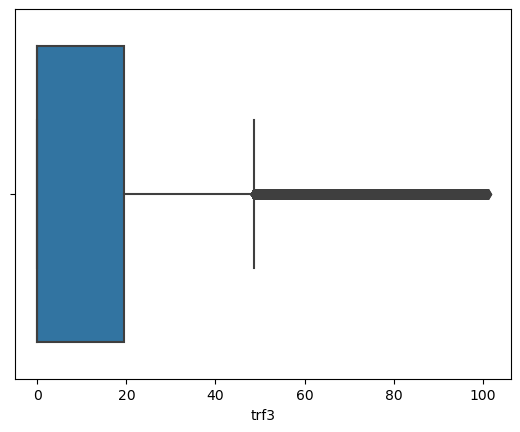

In [48]:
sns.boxplot(df3['trf3'])

In [14]:
df2.dtypes

trf1     float64
trf2     float64
trf3     float64
trf4     float64
trf5     float64
trf6     float64
trf7     float64
trf8     float64
trf9     float64
cload    float64
dvt1     float64
dvt2     float64
dvt3     float64
dvt4     float64
dvt5     float64
dvt6     float64
dvt7     float64
dvt8     float64
dvt9     float64
type       int64
d1       float64
dtype: object

In [116]:
y=df2['d1']
X=df2.drop(['d1'],axis=1)

In [117]:
X.head()

,trf1,trf2,trf3,trf4,trf5,trf6,trf7,trf8,trf9,cload,dvt1,dvt2,dvt3,dvt4,dvt5,dvt6,dvt7,dvt8,dvt9,type
0,25.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.10,0.002080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,11.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.08,0.002070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,59.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.61,0.000969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,29.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.94,0.000858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,45.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.89,0.000848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [118]:
#split the dataset into training and test
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3,random_state=42)

In [119]:
scaler=StandardScaler()

In [120]:
X_train_scaled=scaler.fit_transform(X_train)

In [121]:
X_test_scaled=scaler.fit_transform(X_test)

In [138]:
#linearRegressio
lr=LinearRegression()
model1=lr.fit(X_train,y_train)

In [139]:
y_pred=model1.predict(X_test)

In [140]:
r2 =metrics.r2_score(y_test, y_pred)
print('R2 ',r2)

R2  0.5566469053278638


In [125]:
model2=xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

In [126]:
model2.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [127]:
pred=model2.predict(X_test)

In [128]:
r2 =metrics.r2_score(y_test,pred)
print('R2 ',r2)

R2  0.8658016972150799


The XGboost model performs better than the other  models with an r_squared Score of 86% for this dataset this is the best model that fits the data well

In [129]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [130]:

grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, scoring='neg_mean_squared_error', cv=4, refit=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [133]:
grid_search.best_score_

-0.09374207019956077

In [134]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [135]:
model4=grid_search.best_estimator_

In [136]:
Xgb_pred=model4.predict(X_test)

In [137]:
r2 =metrics.r2_score(y_test, Xgb_pred)
print('R2 ',r2)

R2  0.8665631828486176


In [54]:
#hyperparameter tuning a randomforest
cv_params = {
    'n_estimators': [100],
    'max_depth': [5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1],
    'max_samples': [0.7],
    'max_features': [1.0]
}


In [55]:
rf=RandomForestRegressor()
rf1=GridSearchCV(rf,param_grid=cv_params,scoring='neg_mean_squared_error',cv=4,refit='r2')
rf1.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100]},
             refit='r2', scoring='neg_mean_squared_error')

In [131]:
rf1.best_score_

-0.2735244281746234

In [57]:
model3=rf1.best_estimator_

In [58]:
y_pred=model3.predict(X_test)

In [59]:
#model evaluation
r2 =metrics.r2_score(y_test, y_pred)
print('R2 ',r2)

R2  0.6105610250841345
